# Проработка подходов по увеличению выручки интернет-магазина <a class="tocSkip">

**Цель исследования:**  
Приоритизировать гипотезы для увеличения выручки интернет-магазина, запустить A/B-тест и проанализировать результаты.   

## Загрузка данных и подготовка их к анализу

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# загрузка данных
try:
    hypothesis, orders, visitors = (
        pd.read_csv('/datasets/hypothesis.csv'),  
        pd.read_csv('/datasets/orders.csv'),
        pd.read_csv('/datasets/visitors.csv')
    ) 
except FileNotFoundError:
    print('Неверно указан путь к файлу.')
except:
    print('Ошибка.')

In [3]:
display(hypothesis, orders, visitors)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


- Описание данных  
  
Таблица hypothesis содержит 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort:  

    Hypothesis — краткое описание гипотезы;  
    Reach — охват пользователей по 10-балльной шкале;
    Impact — влияние на пользователей по 10-балльной шкале;
    Confidence — уверенность в гипотезе по 10-балльной шкале;
    Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.
    
Таблица orders содержит информацию о заказах, совершенных пользователями:  

    transactionId — идентификатор заказа;
    visitorId — идентификатор пользователя, совершившего заказ;
    date — дата, когда был совершён заказ;
    revenue — выручка заказа;
    group — группа A/B-теста, в которую попал заказ.    
    
Таблица visitors содержит информацию о количестве пользователей:  

    date — дата;
    group — группа A/B-теста;
    visitors — количество пользователей в указанную дату в указанной группе A/B-теста.    

Мы видим, что столбцы таблиц hypothesis и orders записаны в разном регистре. Для соблюдения единообразия изменим названия колонок в таблицах. 

In [4]:
# переименование колонок
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence','efforts']
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

Посмотрим на общую информацию о таблицах.

In [5]:
# список таблиц
list_of_data = [hypothesis, orders, visitors]

In [6]:
# общая информация о таблицах
for data in list_of_data:
    display(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

Пропуски в таблицах отсутствуют. Однако колонки с датами имеют тип данных object. Для дальнейшей работы с датой необходимо их преобразовать в тип datetime.

In [7]:
# преобразование данных о датах
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Проверим таблицы на наличие дубликатов.

In [8]:
# проверка на дубликаты
for data in list_of_data:
    print('Количество дубликатов:', data.duplicated().sum())

Количество дубликатов: 0
Количество дубликатов: 0
Количество дубликатов: 0


Проверим не попали ли одни и теже пользователи в обе группы тестирования. 

In [9]:
# выберем id пользователей группы А
visitors_a = orders.query('group == "A"')['visitor_id']

# проверим есть ли id пользователей группы А в группе В
users_both_groups = orders.query('group == "B" and visitor_id in @visitors_a')['visitor_id']
print('Количество пользователей, попавших в обе группы: ', len(users_both_groups.drop_duplicates()))

Количество пользователей, попавших в обе группы:  58


Мы выявили 58 пользователей, которые попали в обе группы тестирования. Таких пользователей нужно выявлять на этапе А/А-тестирования. В данном случае по итогам А/В-тестирования мы не cможем корректно их удалить, так как они сагрегированны в таблице `visitors`.

### Вывод

Мы единообразно изменили названия колонок, привели данные к нужному типу и проверили на наличие пропусков и дубликатов. Теперь данные готовы к дальнейшему анализу.

## Часть 1. Приоритизация гипотез

### Приоритизация гипотез с помощью фреймворка ICE 

Применим фреймворк ICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

In [10]:
hypothesis['ice'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(2)
pd.set_option('max_colwidth', 120)
hypothesis[['hypothesis', 'ice']].sort_values('ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


### Приоритизация гипотез с помощью фреймворка RICE 

Применим фреймворк RICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

In [11]:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

hypothesis[['hypothesis', 'rice']].sort_values('rice', ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Отличия в приоритизации гипотез с помощью фреймворков ICE и RICE 

Сделаем ранжировку гипотез, где самым приоритетным гипотезам будет соответствовать 9 баллов, а наименее приоритетным 1 балл. Также визуализируем данные для наглядности.

In [12]:
# ранжирование гипотез
hypothesis_rice = hypothesis[['hypothesis', 'rice']].sort_values('rice').reset_index()
for i in range(0, 9):
     hypothesis_rice.loc[i, 'priority_rice'] = (i+1)
        
hypothesis_ice = hypothesis[['hypothesis', 'ice']].sort_values('ice').reset_index()
for i in range(0, 9):
     hypothesis_ice.loc[i, 'priority_ice'] = (i+1)
        
# объединение таблиц        
total_hypothesis = (hypothesis_ice
                    .merge(hypothesis_rice, on='hypothesis')
                    .drop(['index_y'], axis=1)
                    .sort_values('priority_rice', ascending=False)
                   )
total_hypothesis.columns = ['num_of_hypothesis', 'hypothesis', 'ice', 'priority_ice', 'rice', 'priority_rice']
total_hypothesis['num_of_hypothesis'] = total_hypothesis['num_of_hypothesis'].astype('object')
total_hypothesis

,num_of_hypothesis,hypothesis,ice,priority_ice,rice,priority_rice
6,7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,7.0,112.0,9.0
4,2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,5.0,56.0,8.0
5,6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,6.0,40.0,7.0
7,0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,8.0,40.0,6.0
8,8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,9.0,16.2,5.0
1,3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,2.0,9.0,4.0
2,5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,3.0,4.0,3.0
3,1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.0,4.0,2.0
0,4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,1.0,3.0,1.0


In [13]:
# визуализация 
cm = sns.light_palette("green", as_cmap=True)

(total_hypothesis[['num_of_hypothesis', 'hypothesis', 'priority_ice', 'priority_rice']] 
 .style
 .background_gradient(cmap=cm)
)

,num_of_hypothesis,hypothesis,priority_ice,priority_rice
6,7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",7.000000,9.000000
4,2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",5.000000,8.000000
5,6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",6.000000,7.000000
7,0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",8.000000,6.000000
8,8,"Запустить акцию, дающую скидку на товар в день рождения",9.000000,5.000000
1,3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",2.000000,4.000000
2,5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3.000000,3.000000
3,1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000000,2.000000
0,4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,1.000000


При применении фреймворка ICE самой приоритетной оказалась гипотеза № 8, а вот при применении фреймворка RICE - гипотеза № 7. Отличие в том, что фреймворк RICE в отличие от ICE учитывает охват пользователей. Гипотеза № 7 имеет 10 баллов из 10 по графе "*reach*" - охват пользователей. Наименее приоритетной при использовании обоих фреймворков является гипотеза № 4.  

## Часть 2. Анализ A/B-теста

### График кумулятивной выручки по группам

Чтобы построить графики, собирем кумулятивные данные. Создадим массив уникальных пар значений дат и групп теста.

In [14]:
# массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Соберём агрегированные  по дням кумулятивные данные о заказах.

In [15]:
# агрегированные по дням кумулятивные данные о покупках
orders_aggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# переименование колонок
orders_aggregated.columns = ['date', 'group', 'orders', 'buyers', 'revenue']
orders_aggregated.head()

,date,group,orders,buyers,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

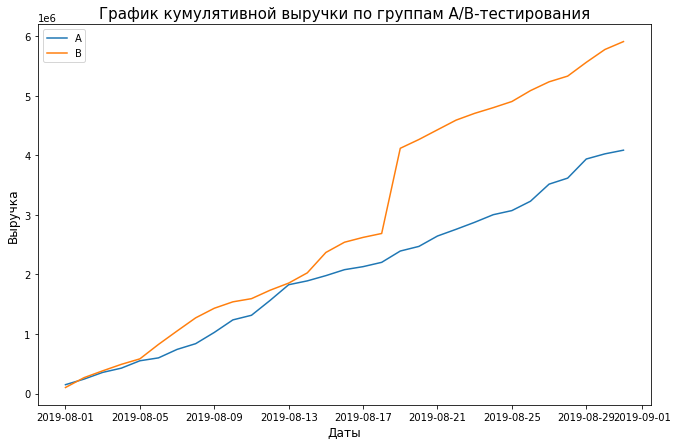

In [16]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = orders_aggregated[orders_aggregated['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = orders_aggregated[orders_aggregated['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(11,7))

# график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.legend()
plt.title('График кумулятивной выручки по группам A/B-тестирования', fontsize=15)
plt.xlabel('Даты', fontsize=12) 
plt.ylabel('Выручка', fontsize=12)
plt.show()

Выручка увеличивается в течение всего теста. Однако график выручки группы В резко вырос 19-20 августа 2019 г. Это может быть всплеском числа заказов, либо появлением очень дорогих заказов в выборке, то есть выбросов.

### График кумулятивного среднего чека по группам

Построим графики среднего чека по группам А/В-тестирования.

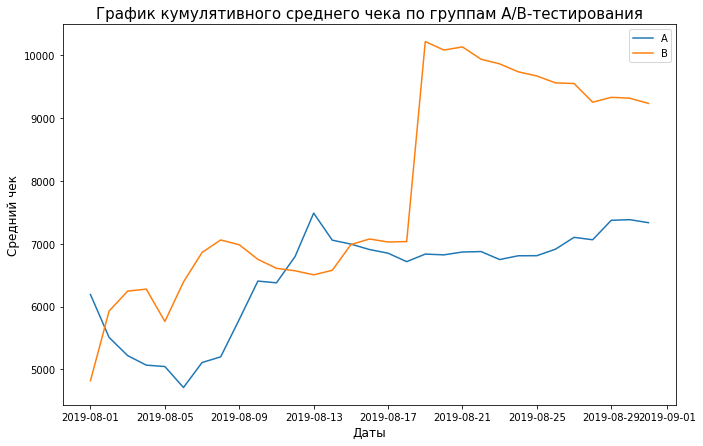

In [17]:
plt.figure(figsize=(11,7))
# график среднего группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')

# график среднего группы В
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.legend() 
plt.title('График кумулятивного среднего чека по группам A/B-тестирования', fontsize=15)
plt.xlabel('Даты', fontsize=12) 
plt.ylabel('Средний чек', fontsize=12)
plt.show()

Средний чек установился ближе к концу теста для группы А, но начал падать для группы B. Вероятно, в группу B начиная с 19-20 августа попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### График относительного изменения кумулятивного среднего чека группы B к группе A

Построим график относительного различия для среднего чека. 

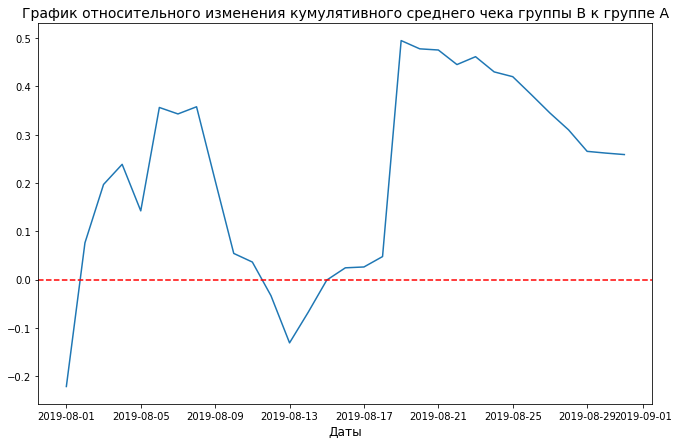

In [18]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = (
    cumulative_revenue_a
    .merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])
)

# график отношения средних чеков
plt.figure(figsize=(11,7))
(
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenue_b']/merged_cumulative_revenue['orders_b'])\
                                          /(merged_cumulative_revenue['revenue_a']/merged_cumulative_revenue['orders_a'])-1)
)

# линия уровня
plt.axhline(y=0, color='red', linestyle='--') 

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=14)
plt.xlabel('Даты', fontsize=12) 
plt.show()

В целом средний чек группы В значительно превышает среднйи чек группы А. Однако в нескольких точках график различия между сегментами резко «скачет». Вероятно это связано с крупными заказами и выбросами. 

### График кумулятивной конверсии по группам

Построим график кумулятивной конверсии по группам А/В-тестирования. Для этого сначала соберем кумулятивные данные о посетителях интернет-магазина по дням. Затем поисчтаем кумулятивную конверсию по группам. 

In [19]:
# агрегированные кумулятивные по дням данные о посетителях 
visitors_aggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объединение кумулятивных данных в одну таблицу 
cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

# переименование столбцов
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


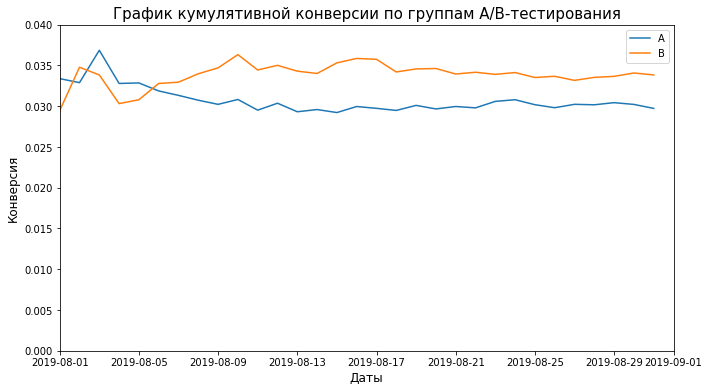

In [20]:
# кумулятивная конверсия
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# графики
plt.figure(figsize=(11,6))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.legend()
plt.title('График кумулятивной конверсии по группам A/B-тестирования', fontsize=15)
plt.xlabel('Даты', fontsize=12) 
plt.ylabel('Конверсия', fontsize=12)

# масштаб осей
plt.axis([dt.datetime.strptime('2019-08-01', '%Y-%m-%d'), dt.datetime.strptime('2019-09-01', '%Y-%m-%d'), 0, 0.040])
plt.show()

Через неделю после начала тестирования конверсия группы В вырвалась вперёд и зафиксировалась на уровне около 3,4%, а конверсия группы А просела и также зафиксировалась на уровне 3%.

### График относительного изменения кумулятивной конверсии группы B к группе A

Построим график относительного различия кумулятивных конверсий.

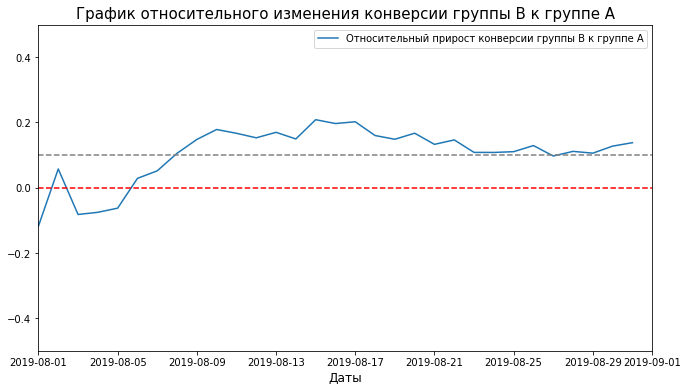

In [21]:
# собираем данные в одном датафрейме
merged_cumulative_conversions = (
    cumulative_data_a[['date','conversion']]
    .merge(cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)

# график отношения конверсии
plt.figure(figsize=(11,6))
plt.plot(
    merged_cumulative_conversions['date'], 
    merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1, 
    label="Относительный прирост конверсии группы B к группе A"    
)
plt.legend()

plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis([dt.datetime.strptime('2019-08-01', '%Y-%m-%d'), dt.datetime.strptime('2019-09-01', '%Y-%m-%d'), -0.5, 0.5])
plt.title('График относительного изменения конверсии группы B к группе А', fontsize=15)
plt.xlabel('Даты', fontsize=12) 
plt.show()

В первую неделю теста группа B проигрывала группе A, затем вырвалась вперёд. Менее, чем через 3 недели после начала теста её конверсия начала снижаться.
В целом можно сказать, что конверсия уже установилась и присрост конверсии группы В отсносительно группы А составляет 10-14%. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину. 

### Точечный график количества заказов по пользователям

Построим точечную диаграмму числа заказов на одного пользователя.

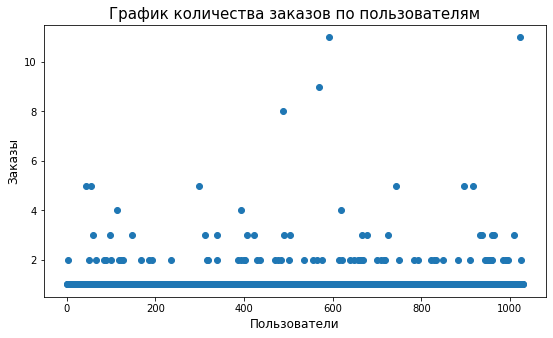

In [22]:
# количество заказов по пользователям 
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

# переименование столбцов
orders_by_users.columns = ['user_id', 'orders']

# точечный график
x_values = pd.Series(range(0,len(orders_by_users)))
plt.figure(figsize=(9,5))
plt.scatter(x_values, orders_by_users['orders']) 
plt.title('График количества заказов по пользователям', fontsize=15)
plt.xlabel('Пользователи', fontsize=12) 
plt.ylabel('Заказы', fontsize=12) 
plt.show()

Большинство покупателей делают только один заказ. Много пользователей с 2-4 заказами. Чтобы понять считать их аномалиями или нет, воспользумся подсчетом перцентилей.

###  Определение границы аномальных пользователей

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя и выберем границу для определения аномальных пользователей.

In [23]:
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

95% прцентов пользователей совершают 1-2 заказа. Примем за аномальных пользователей тех, кто совершил больше 2 заказов. Так мы уберём 5% пользователей с большим числом заказов.

### Точечный график стоимостей заказов

Посторим точечный график стоимостей заказов, чтобы увидеть аномально дорогие заказы.

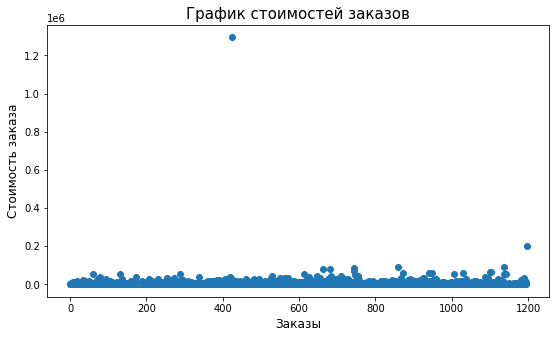

In [24]:
# точечный график
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(9,5))
plt.scatter(x_values, orders['revenue']) 
plt.title('График стоимостей заказов', fontsize=15)
plt.xlabel('Заказы', fontsize=12) 
plt.ylabel('Стоимость заказа', fontsize=12) 
plt.show()

Как мы и предполагали есть несколько дорогих заказов, которые доходят до 1,2 млн. рублей. По графику можно выбрать границу аномальных заказов около 100 000 рублей. Однако для определения точной границы воспользумся подсчетом перцентилей. 

### Определение границы аномальных заказов

Посчитаем 95-й и 99-й перцентили стоимости заказов и выберем границу для определения аномальных заказов.

In [25]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

5% пользователей совершают заказы на сумму более 28 000 рублей, а 1% пользователей на сумму более 58 000 тыясч рублей. Примем за аномальных пользователей тех, кто совершил заказ дороже 30 000 рублей. Так мы уберём от 1% до 5% пользователей с дорогими заказами.

### Cтатистическая значимость различий в конверсии между группами по «сырым» данным

Посчитаем статистическую значимость различий в конверсии между группами А/В-тестирования по «сырым» данным. Для этого сначала посчитаем количество пользователей, количество закаов и выручку по группам А/В-тестирования в каждую дату и с нарастающим итогом. Затем объединим все данные в одну талицу. 

In [26]:
# количество пользователей в выбранную дату в группе А
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

# количество пользователей до выбранной даты вкл. в группе A
visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

# количество пользователей в выбранную дату в группе В
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

# количество пользователей до выбранной даты вкл. в группе В
visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

# количество заказов в выбранную дату в группе A
# суммарная выручка в выбранную дату в группе A
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

# суммарное число заказов до выбранной даты вкл. в группе A
# суммарная выручка до выбранной даты вкл. в группе А
orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

# количество заказов в выбранную дату в группе В
# суммарная выручка в выбранную дату в группе В
orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

# суммарное число заказов до выбранной даты вкл. в группе В
# суммарная выручка до выбранной даты вкл. в группе В
orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

# объединение таблиц
total_data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

total_data.head() 

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные orders_by_users_a и orders_by_users_b со столбцами ['user_id', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [27]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users_b.columns = ['visitor_id', 'orders'] 

Объявим переменные sample_a и sample_b, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [28]:
sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                total_data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b = pd.concat(
    [
        orders_by_users_b['orders'], 
        pd.Series(
            0, 
            index=np.arange(
                total_data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ), 
            name='orders'
        )
    ], 
    axis=0
) 

- Для того, чтобы определить каким критерием проверять статистическую значимость различий данных в выборках: параметрическим или непараметрическим, проверим данные на нормальное распределение. Для это используем критерий Шапиро-Уилка.

Сформулируем нулевую и альтернативную гипотезы:    
    
**H0** - количество заказов, совершаемых пользователями распределено нормально    
**H1** - распределение не нормально
  
Установим уровень статистической значимости α = 0,05.

In [29]:
alpha = 0.05  

results = stats.shapiro(sample_a)
p_value = results[1]  

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [30]:
alpha = 0.05  

results = stats.shapiro(sample_b)
p_value = results[1]  

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


По итогам проверки выборок мы видим, что данные распределены не нормально, а значит для выявления различий нам стоит применить непараметрический критерий Манна-Уитни. 

Сформулируем нулевую и альтернативную гипотезы:    
    
**H0** - статистически значимых различий в конверсии между группами А/В-тестирования нет    
**H1** - конверсии между группами А/В-тестирования имеют статистически значимые отличия
  
Установим уровень статистической значимости α = 0,05. Применим критерий Манна-Уитни и выведем p-value. Также выведем относительное изменение конверсии группы B к группе А. Округлим до трёх знаков после запятой.

In [31]:
print('Значение p-value: {0:.3f}'.format(stats.mannwhitneyu(sample_a, sample_b, True, 'two-sided')[1]))
print('Относительное изменение конверсии группы B к группе А: {0:.3f}'.format(sample_b.mean() / sample_a.mean() - 1))

Значение p-value: 0.017
Относительное изменение конверсии группы B к группе А: 0.138


Вывод: по «сырым» есть статистические различия в конверсии групп A и B.  
p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный прирост конверсии группы B равен 13.8%.

Эти данные данные также подтверждают график отностительного изменения кумулятивной конверсии, который показал прирост конверсии группы В к группе А к концу тестированая на уровне 14%.

### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

- Для того, чтобы определить каким критерием проверять статистическую значимость различий данных в выборках: параметрическим или непараметрическим, проверим данные на нормальное распределение. Для это используем критерий Шапиро-Уилка.

Сформулируем нулевую и альтернативную гипотезы:    
    
**H0** - суммы чеков пользователей распределены нормально    
**H1** - распределение не нормально
  
Установим уровень статистической значимости α = 0,05.

In [32]:
alpha = 0.05  

results = stats.shapiro(orders[orders['group']=='A']['revenue'])
p_value = results[1]  

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  1.739703399801917e-34
Отвергаем нулевую гипотезу: распределение не нормально


In [33]:
alpha = 0.05  

results = stats.shapiro(orders[orders['group']=='B']['revenue'])
p_value = results[1]  

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


По итогам проверки выборок мы видим, что данные распределены не нормально, а значит для выявления различий нам стоит применить непараметрический критерий Манна-Уитни. 

Посчитаем статистическую значимость различий в среднем чеке между группами А/В-тестирвания по «сырым» данным.

Сформулируем нулевую и альтернативную гипотезы:    
    
**H0** - статистически значимых различий в среднем чеке между группами А/В-тестирования нет    
**H1** - средний чек между группами А/В-тестирования имеют статистически значимые отличия

Установим уровень статистической значимости α = 0,05. Применим критерий Манна-Уитни и выведем p-value. Также выведем относительное изменение среднего чека группы B к группе А. Округлим до трёх знаков после запятой.

In [34]:
print('Значение p-value: {0:.3f}'.format(
    stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], True, 'two-sided')[1]
))
print('Относительное изменение среднего чека группы B к группе А: {0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1
)) 

Значение p-value: 0.729
Относительное изменение среднего чека группы B к группе А: 0.259


Вывод: По «сырым» данным различий в среднем чеке групп A и B нет.  
P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы B выше среднего чека группы A на 25,9%.

### Cтатистическая значимость различий в конверсии между группами по «очищенным» данным

Сделаем срезы пользователей с числом заказов больше 2 и пользователей, совершивших заказы дороже 30 000. Объединим их в таблице abnormal_users.

In [35]:
# срез пользователей с числом заказов больше 2
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 2]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)

# срез пользователей, совершивших заказы дороже 30 000
users_with_expensive_orders = orders[orders['revenue'] > 30000]['visitor_id']

# объединение таблиц
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print('Количество аномальных пользователей:', abnormal_users.shape)

Количество аномальных пользователей: (68,)


Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [36]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                total_data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                total_data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Сформулируем нулевую и альтернативную гипотезы:      
      
**H0** - статистически значимых различий в конверсии между группами А/В-тестирования нет      
**H1** - конверсии между группами А/В-тестирования имеют статистически значимые отличия  
  
Установим уровень статистической значимости α = 0,05. Применим критерий Манна-Уитни к полученным выбокам. Выведем относительное изменение конверсии группы B к группе А.

In [37]:
print('Значение p-value: {0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered, True, 'two-sided')[1]))
print('Относительное изменение конверсии группы B к группе А: {0:.3f}'.format(
    sample_b_filtered.mean() / sample_a_filtered.mean() - 1
))

Значение p-value: 0.013
Относительное изменение конверсии группы B к группе А: 0.172


P-value практически не изменился, а относительный прирост конверсии группы В к группе А увеличился с 13,8% до 17,2%.  
Р-value остался также меньше 0.05, значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. 

### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Сформулируем нулевую и альтернативную гипотезы:      
      
**H0** - статистически значимых различий в среднем чеке между группами А/В-тестирования нет      
**H1** - средний чек между группами А/В-тестирования имеют статистически значимые отличия  
  
Установим уровень статистической значимости α = 0,05. Применим критерий Манна-Уитни к полученным данным и выведем относительное изменение среднего чека группы B к группе А.

In [38]:
print(
    'Значение p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'], True, 'two-sided'
        )[1]
    )
)

print(
    'Относительное изменение среднего чека группы B к группе А: {0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

Значение p-value: 0.720
Относительное изменение среднего чека группы B к группе А: -0.023


P-value практически еще больше увеличился, но вот и разница между сегментами существенно изменилась. Средний чек группы B снизился относительно среднего чека группы A на с 25,9% до -2,3%.  
Не смотря на это, р-value остался значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

### Выводы и решения по результатам теста

На данный момент по результатам теста можно сделать следующие выводы:
- Есть статистически значимое различие по конверсии между группами как по «сырым», так и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График относительного различия конверсии между группами сообщает, что результаты группы B лучше группы A на 13,8% по «сырым» данным и на 17,2% по данным без аномалий;
- Средний чек группы B выше относительно среднего чека группы A по «сырым» данным, но наоборот ниже по данным без аномалий. Вероятно средний чек группы В еще не установился.

**Стоит продолжить тестирование, нужно больше данных, чтобы зафиксировался средний чек группы В. Группа В показывает хорошие результаты по конверсии, возможно средний срек группы В также установится выше среднего чека группы А, либо они не будут отличаться.**